analytic vs. numeric solutions

Physics for falling object:
d2/d2t(z) = -g
Analytical:
z = -gt**2 / 2 + c1T + c2

Numeric:
d/dt (z) = v
d/dt (v) = -g
d/dt [z, v] = [v, -g]

Euler's method
d/dt(u) = f(u,t)

f(u,t) = u(t+dt)-u(t) / dt

solve for u:
find slope at progressive intervals of dt


In [2]:
# import

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
g = 9.81 # m/s2
z0 = 100 #m

# dz/dt = v
# dv/dt = -g
# u[0] = Z
# u[1] = v

def myfun(t, u):
    f = np.zeros((2))
    f[0] = u[1]
    f[1] = -g
    return f

# init conditions
u0 = np.zeros((2))
u0[0] = z0
u0[1] = 0

#time step:
t0 = 0
tmax = 5 #s
dt = 0.1 #s

t = np.arange(t0, tmax, dt)
NN = np.shape(t)
N = NN[0]



In [6]:
#NUMERIC 
# python builtin RK 4th order

sol = solve_ivp(myfun, [t0, tmax], u0, method='RK45', t_eval=t)

Text(0, 0.5, 'h (m)')

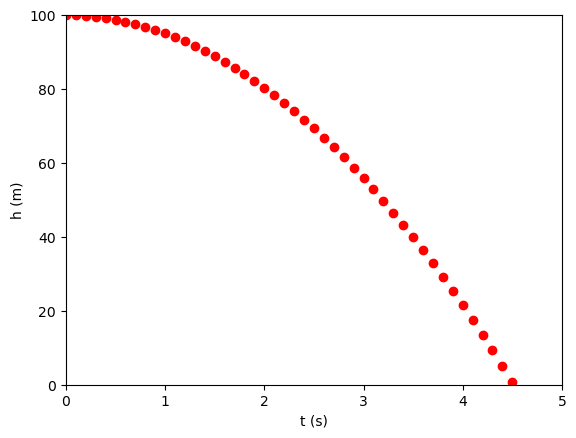

In [8]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0, tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label="RK Built In" )
plt.xlabel('t (s)')
plt.ylabel('h (m)')

In [10]:
# ANALYTIC METHOD
# Exact solution!

uT = np.zeros((2, N))
# uT[0, i] = height
# ut[1, i] = v

for i in range(N):
    uT[0, i] =  z0 - g * (t[i]**2)/2
    uT[1, i] = -g*t[i]

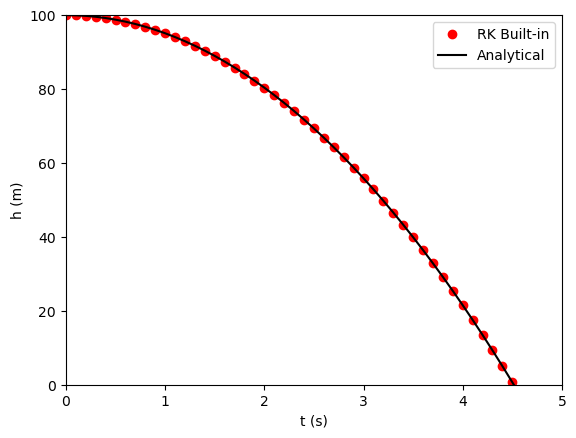

In [12]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0, tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label="RK Built-in" )
plt.plot(t, uT[0,:], 'k-', label="Analytical" )
plt.xlabel('t (s)')
plt.ylabel('h (m)')
plt.legend()

In [24]:
#Numeric
# Euler method

uE = np.zeros((2,N))
uE[:,0] = u0

for i in range(1, N):
    dudt = myfun(t[i-1], uE[:, i-1])
    uE[:,i] = uE[:, i-1] + dt*dudt

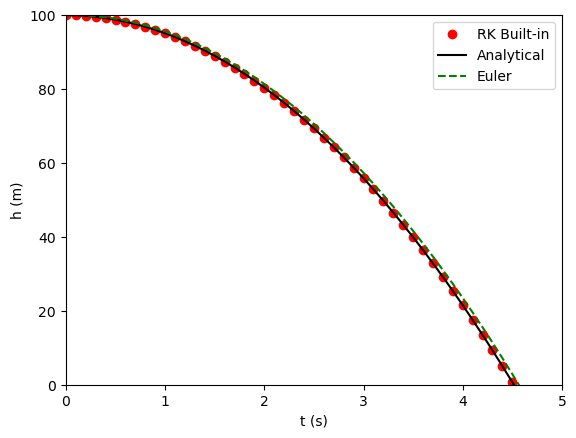

In [25]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0, tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label="RK Built-in" )
plt.plot(t, uT[0,:], 'k-', label="Analytical" )
plt.plot(t, uE[0,:], 'g--', label="Euler" )
plt.xlabel('t (s)')
plt.ylabel('h (m)')
plt.legend()

In [28]:
# Runge Kutta Custom

uRK = np.zeros((2,N))
uRK[:,0] = u0

for i in range(1, N):
    tp = t[i-1] # time at previous step
    up = uRK[:,i-1] # previous velocity
    k1 = myfun(tp, up) # initial derivative (slope)
    k2 = myfun(tp + dt/2, up + dt/2*k1)
    k3 = myfun(tp + dt/2, up + dt/2*k2)
    k4 = myfun(tp + dt, up + dt*k3)
    uRK[:,i] = up + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

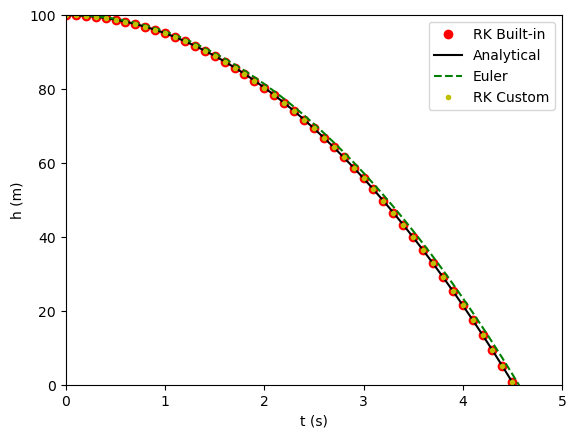

In [30]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0, tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label="RK Built-in" )
plt.plot(t, uT[0,:], 'k-', label="Analytical" )
plt.plot(t, uE[0,:], 'g--', label="Euler" )
plt.plot(t, uRK[0,:], 'y.', label="RK Custom" )
plt.xlabel('t (s)')
plt.ylabel('h (m)')
plt.legend()

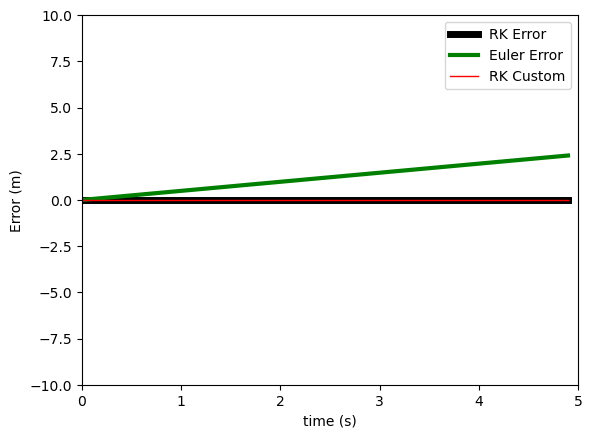

In [34]:
#error

fig2 = plt.figure()
ax2 = plt.subplot(1,1,1)
plt.axis( [t0, tmax, -10, 10] )
plt.xlabel('time (s)')
plt.ylabel('Error (m)')
plt.plot(sol.t, sol.y[0] - uT[0,:], 'k-', lw=5, label='RK Error')
plt.plot(t, uE[0,:] - uT[0,:], 'g-', lw=3, label="Euler Error")
plt.plot(t, uRK[0,:] - uT[0,:], 'r-', lw=1, label="RK Custom")
plt.legend()